In [1]:
# Imports
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
sc.settings.set_figure_params(dpi=100, facecolor='white')

In [2]:
day0 = sc.read_h5ad('/Users/cecileherbermann/Downloads/dataset_CFS_d0_indi_analysed_light.h5ad')
day2 = sc.read_h5ad('/Users/cecileherbermann/Downloads/dataset_CFS_d2_indi_analysed_light.h5ad')
day14 = sc.read_h5ad('/Users/cecileherbermann/Downloads/dataset_CFS_d14_indi_analysed_light.h5ad')
day28 = sc.read_h5ad('/Users/cecileherbermann/Downloads/dataset_CFS_d28_indi_analysed_light.h5ad')

In [3]:
# 10504 cells x 27622 genes
print(day0)

# 8021 cells x 27622 genes
print(day2)

# 11332 cells x 27622 genes
print(day14)

# 9734 cells x 27622 genes
print(day28)

AnnData object with n_obs × n_vars = 10504 × 27622
    obs: 'louvain', 'phase'
    var: 'gene_types'
AnnData object with n_obs × n_vars = 8021 × 27622
    obs: 'louvain', 'phase'
    var: 'gene_types'
AnnData object with n_obs × n_vars = 11332 × 27622
    obs: 'louvain', 'phase'
    var: 'gene_types'
AnnData object with n_obs × n_vars = 9734 × 27622
    obs: 'louvain', 'phase'
    var: 'gene_types'


In [4]:
# Annotate mitochondiral genes
# day0.var['mt'] = day0.var_names.str.startswith('MT-')
# day2.var['mt'] = day2.var_names.str.startswith('MT-')
# day14.var['mt'] = day14.var_names.str.startswith('MT-')
# day28.var['mt'] = day28.var_names.str.startswith('MT-')
# Annotate ribosomal genes
# Read ribosomal genes from url
# ribo_url = "http://software.broadinstitute.org/gsea/msigdb/download_geneset.jsp?geneSetName=KEGG_RIBOSOME&fileType=txt"
# ribo_genes = pd.read_table(ribo_url, skiprows=2, header = None)

# Annotate ribosomal genes in adata.var
# day0.var['ribo'] = day0.var_names.isin(ribo_genes[0].values)
# day2.var['ribo'] = day2.var_names.isin(ribo_genes[0].values)
# day14.var['ribo'] = day14.var_names.isin(ribo_genes[0].values)
# day28.var['ribo'] = day28.var_names.isin(ribo_genes[0].values)

In [5]:
# Calculate qc metrics 
sc.pp.calculate_qc_metrics(day0, percent_top=None, log1p=False, inplace=True)
sc.pp.calculate_qc_metrics(day2, percent_top=None, log1p=False, inplace=True)
sc.pp.calculate_qc_metrics(day14, percent_top=None, log1p=False, inplace=True)
sc.pp.calculate_qc_metrics(day28, percent_top=None, log1p=False, inplace=True)

print(day0) #see new columns
# n_genes_by_counts = how many genes are expressed in a cell -> obs
# total_counts = total number of counts in a cell -> obs
# total_counts_mt = total number of mitochondrial gene counts in a cell -> obs
# pct_counts_mt = percentage of mitochondrial gene counts from total counts -> obs
# total_counts_ribo = total number of ribosomal gene counts in a cell -> obs
# pct_counts_ribo = percentage of ribosomal gene counts from total counts -> obs

# n_cells_by_counts = how many cells express a gene -> var
# mean_counts = mean number of counts for a gene -> var
# pct_dropout_by_counts = percentage of cells with zero counts for a gene -> var
# total_counts = total number of counts for a gene -> var


AnnData object with n_obs × n_vars = 10504 × 27622
    obs: 'louvain', 'phase', 'n_genes_by_counts', 'total_counts'
    var: 'gene_types', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'


<Axes: xlabel='total_counts', ylabel='n_genes_by_counts'>

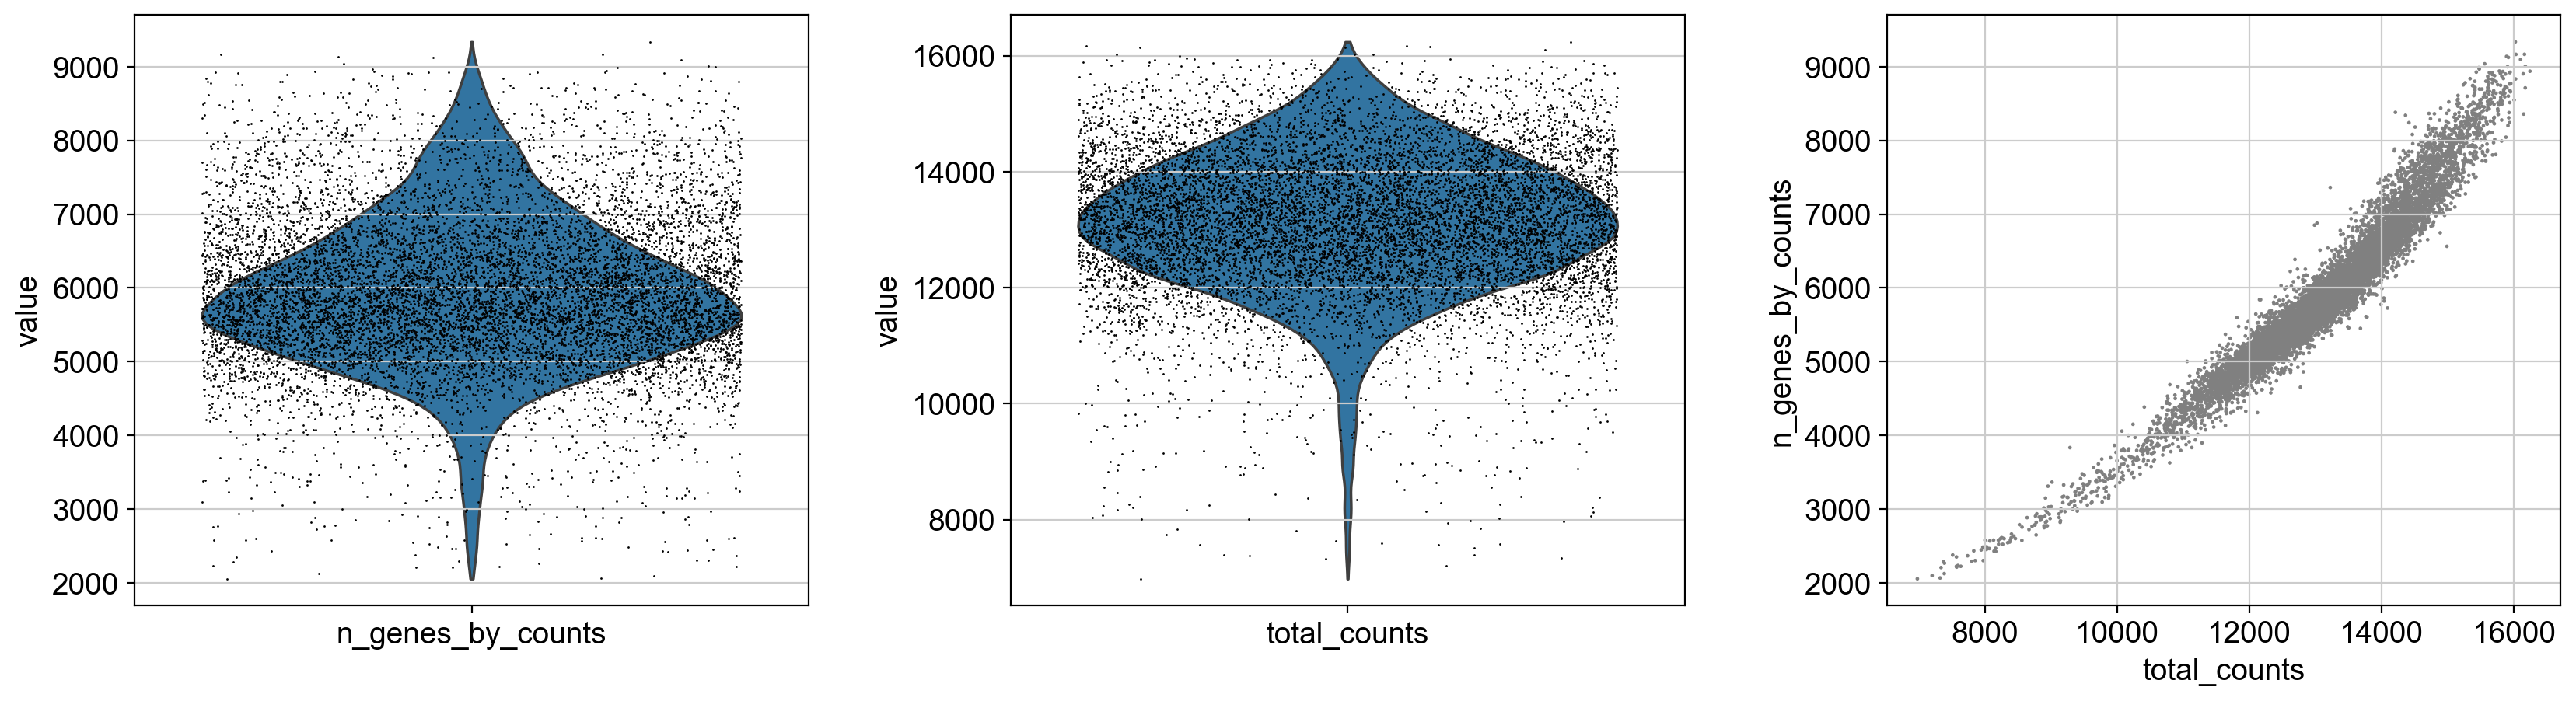

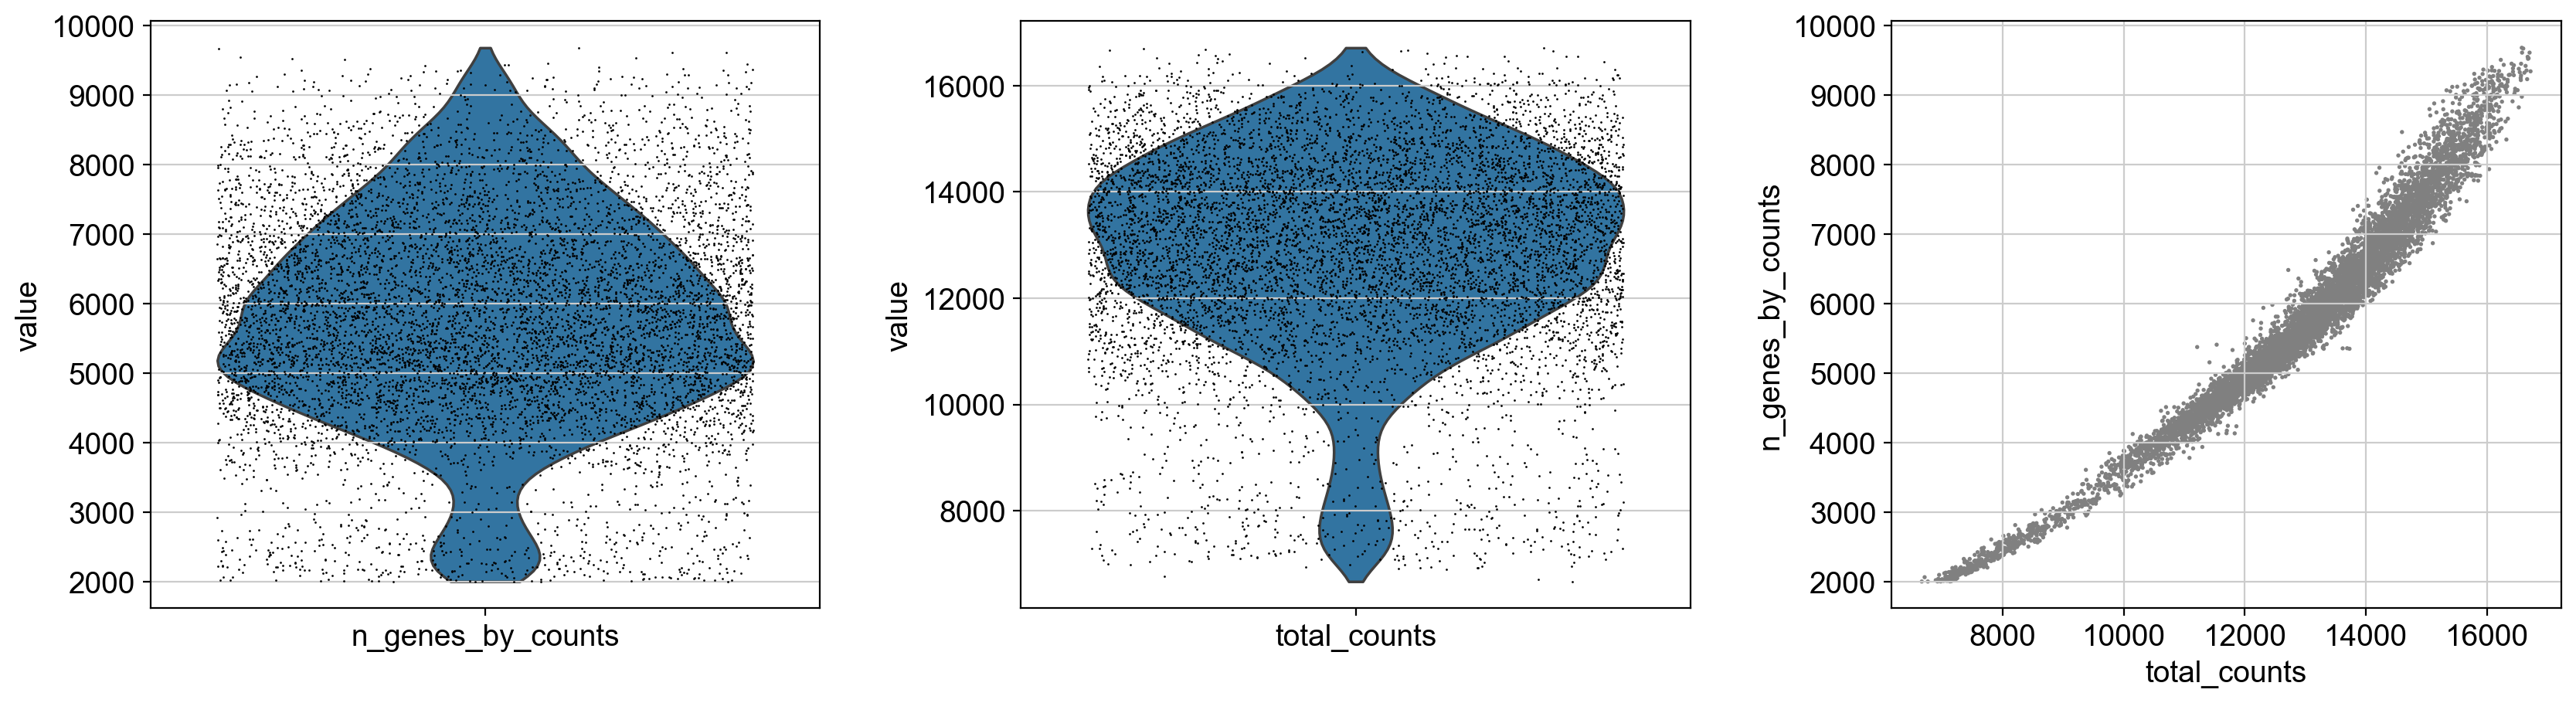

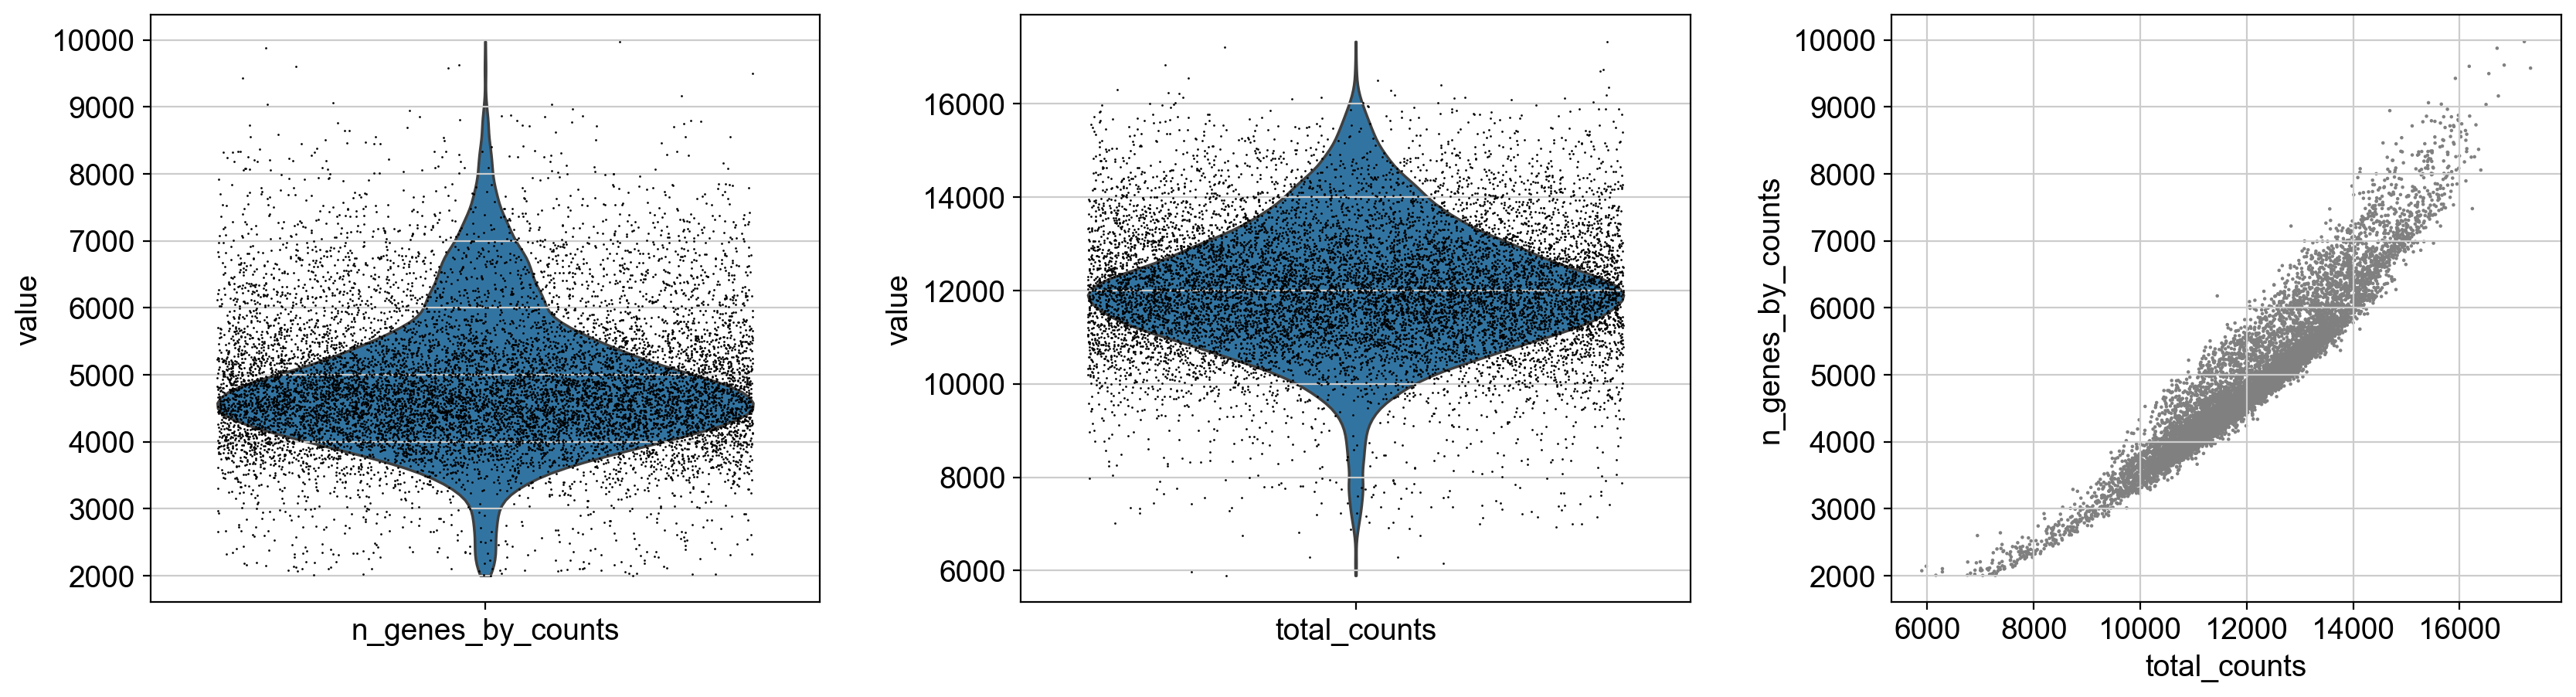

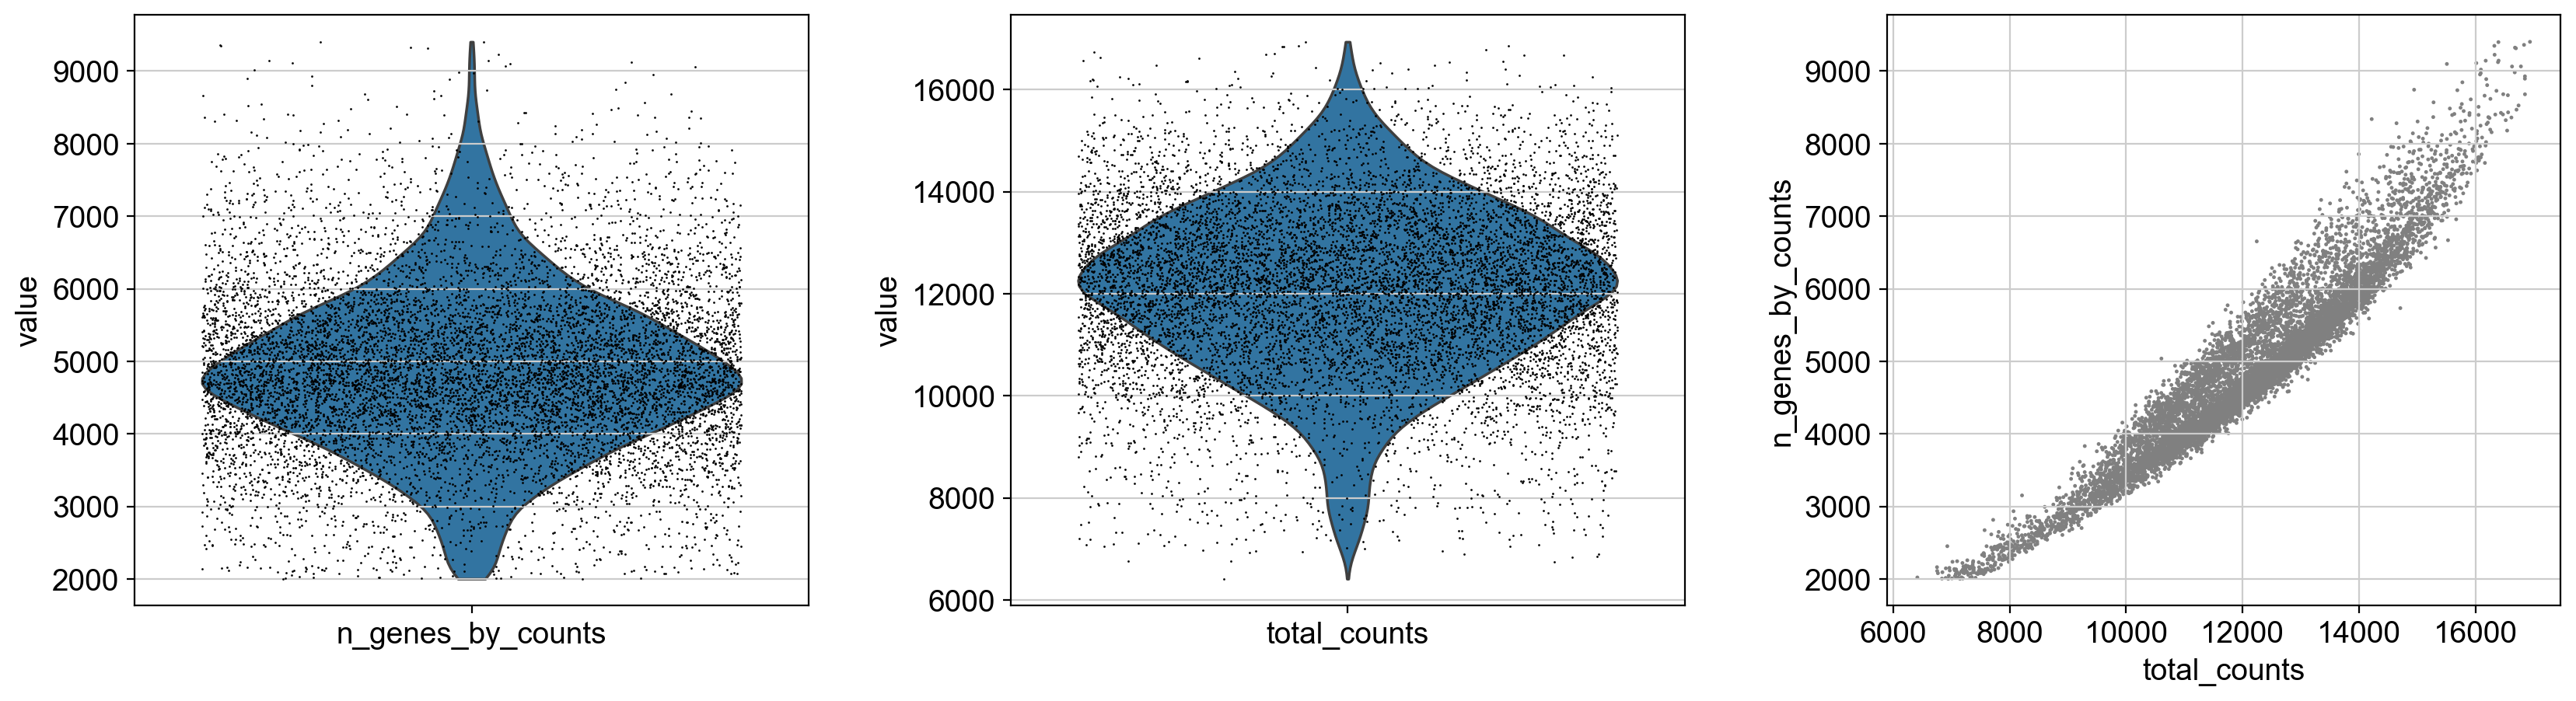

In [6]:
# Plot number of genes, total counts and their correlation
# Day 0
fig,axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 5), sharex=False, sharey=False)
plt.subplots_adjust(wspace=0.3)
sc.pl.violin(day0, 'n_genes_by_counts', jitter=0.4, ax=axs[0], show=False)
sc.pl.violin(day0, 'total_counts', jitter=0.4, ax=axs[1], show=False)
sc.pl.scatter(day0, x='total_counts', y='n_genes_by_counts', ax=axs[2],show=False)

# Day 2
fig,axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 5), sharex=False, sharey=False)
plt.subplots_adjust(wspace=0.3)
sc.pl.violin(day2, 'n_genes_by_counts', jitter=0.4, ax=axs[0], show=False)
sc.pl.violin(day2, 'total_counts', jitter=0.4, ax=axs[1], show=False)
sc.pl.scatter(day2, x='total_counts', y='n_genes_by_counts', ax=axs[2],show=False)

# Day 14
fig,axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 5), sharex=False, sharey=False)
plt.subplots_adjust(wspace=0.3)
sc.pl.violin(day14, 'n_genes_by_counts', jitter=0.4, ax=axs[0], show=False)
sc.pl.violin(day14, 'total_counts', jitter=0.4, ax=axs[1], show=False)
sc.pl.scatter(day14, x='total_counts', y='n_genes_by_counts', ax=axs[2],show=False)

# Day 28
fig,axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 5), sharex=False, sharey=False)
plt.subplots_adjust(wspace=0.3)
sc.pl.violin(day28, 'n_genes_by_counts', jitter=0.4, ax=axs[0], show=False)
sc.pl.violin(day28, 'total_counts', jitter=0.4, ax=axs[1], show=False)
sc.pl.scatter(day28, x='total_counts', y='n_genes_by_counts', ax=axs[2],show=False)

/Users/cecileherbermann/opt/anaconda3/envs/scgpt/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


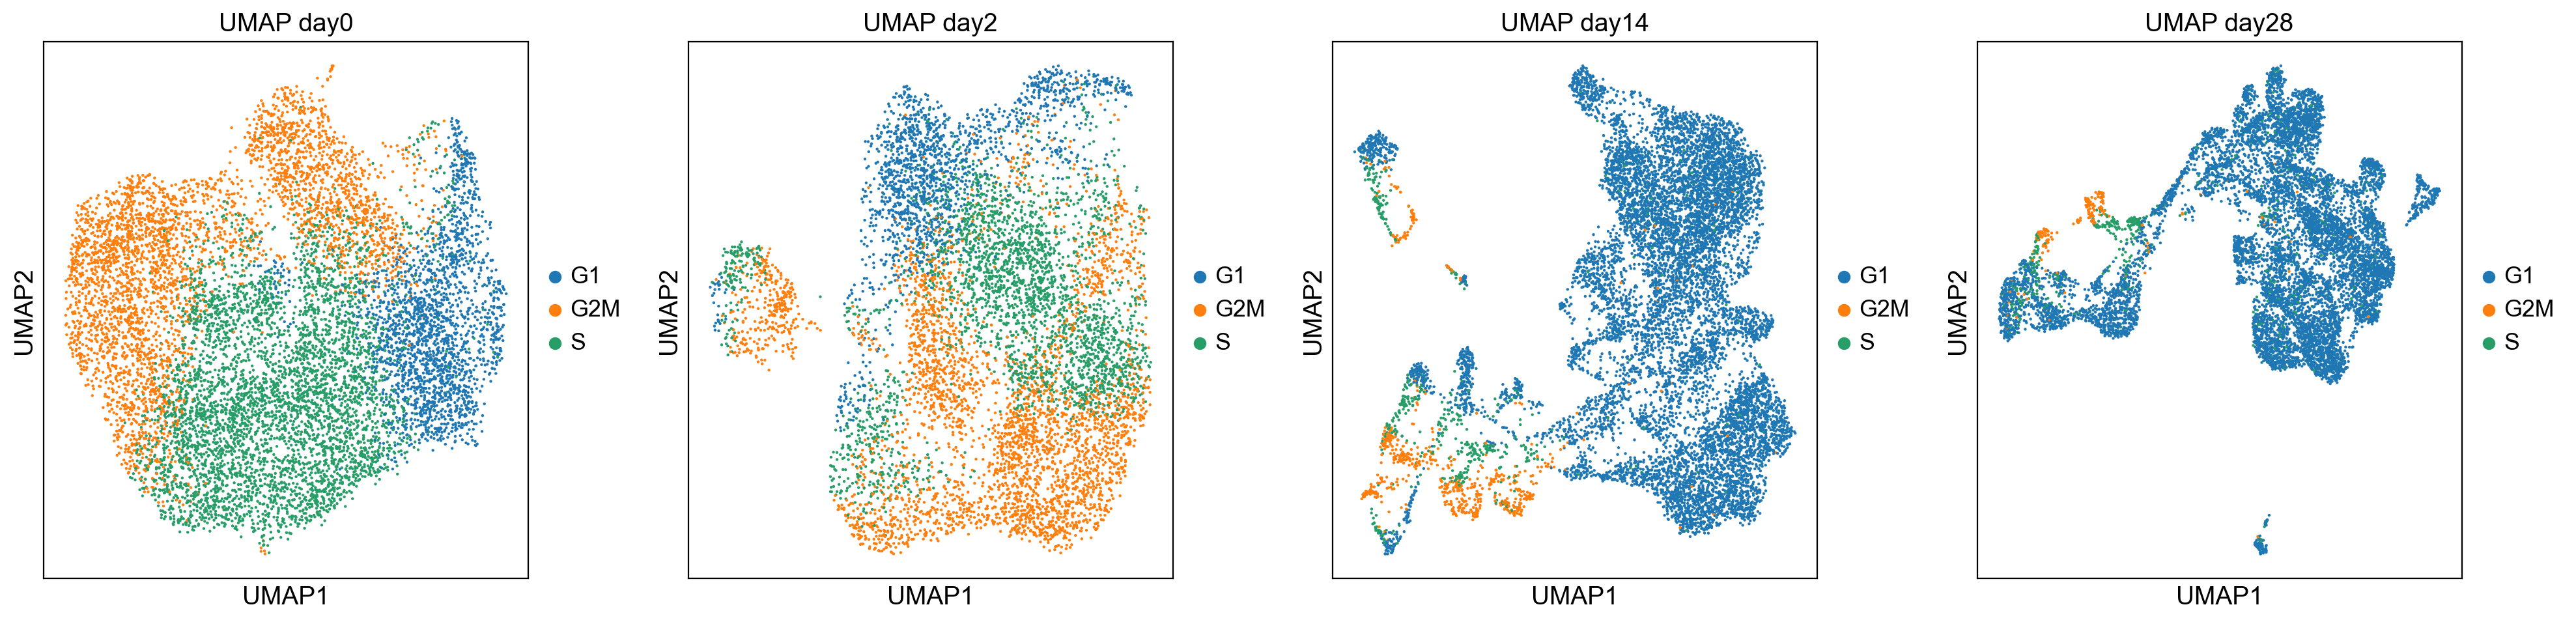

In [7]:
days = ['day0', 'day2', 'day14', 'day28']
datasets = [day0, day2, day14, day28]

# Process each dataset
for data in datasets:
    sc.pp.normalize_total(data, target_sum=1e4)
    sc.pp.log1p(data)
    sc.pp.highly_variable_genes(data)
    sc.pp.scale(data, max_value=10)
    sc.tl.pca(data, svd_solver='arpack')
    sc.pp.neighbors(data, n_pcs=40)
    sc.tl.umap(data)

# Plotting UMAPs
fig, axs = plt.subplots(1, 4, figsize=(20, 5))  # Adjust size as needed

for ax, data, day in zip(axs, datasets, days):
    sc.pl.umap(data, color='phase', size=10, show=False, ax=ax, title=f'UMAP {day}')

plt.tight_layout()
plt.show()

Unique least variable genes by day:
Day 0: {'LOC102724080', 'LINC02668', 'PNMA6F', 'APOBEC4', 'CST6', 'NPY2R-AS1', 'LINC01717', 'LOC105372072', 'SUPT20HL2', 'LINC02096', 'LOC105376436', 'LOC105370832', 'LOC107987084', 'CYP2B7P', 'LMO7DN', 'LINC01492', 'LINC00460', 'LOC105374760', 'POU5F1P3', 'LOC107985812', 'LOC105374282', 'PIWIL3', 'C4orf46P3', 'LINC01779', 'TEKT4', 'C8orf44-SGK3', 'LINC02113', 'LINC01127', 'HK3', 'ANGPTL8', 'LOC102724749', 'LOC102724458', 'B3GNT3', 'CCL4L2', 'PLAAT5', 'LOC105378469', 'PPP1R14D', 'LOC105375556', 'LOC105374329', 'LOC101929492', 'LOC101927730', 'CCDC73', 'PTPRC', 'LINC02183', 'GOLGA2P6', 'LOC105379412', 'COMMD3-BMI1', 'LINC01592', 'LOC107984663'}
Day 2: {'GPR4', 'LINC01944', 'LOC107986450', 'CASC16', 'XACT', 'SPANXD', 'C10orf126', 'LOC105378956', 'FYB1', 'LINC01750', 'LOC105378314', 'TTC9-DT', 'MIR6843', 'LOC105371131', 'DENND5B-AS1', 'SLITRK3', 'LOC105375719', 'LOC105378308', 'SNORA48', 'PLAAT2', 'LOC107985232', 'PIK3R5-DT', 'FAM242D', 'OR9K2', 'CYP2B6

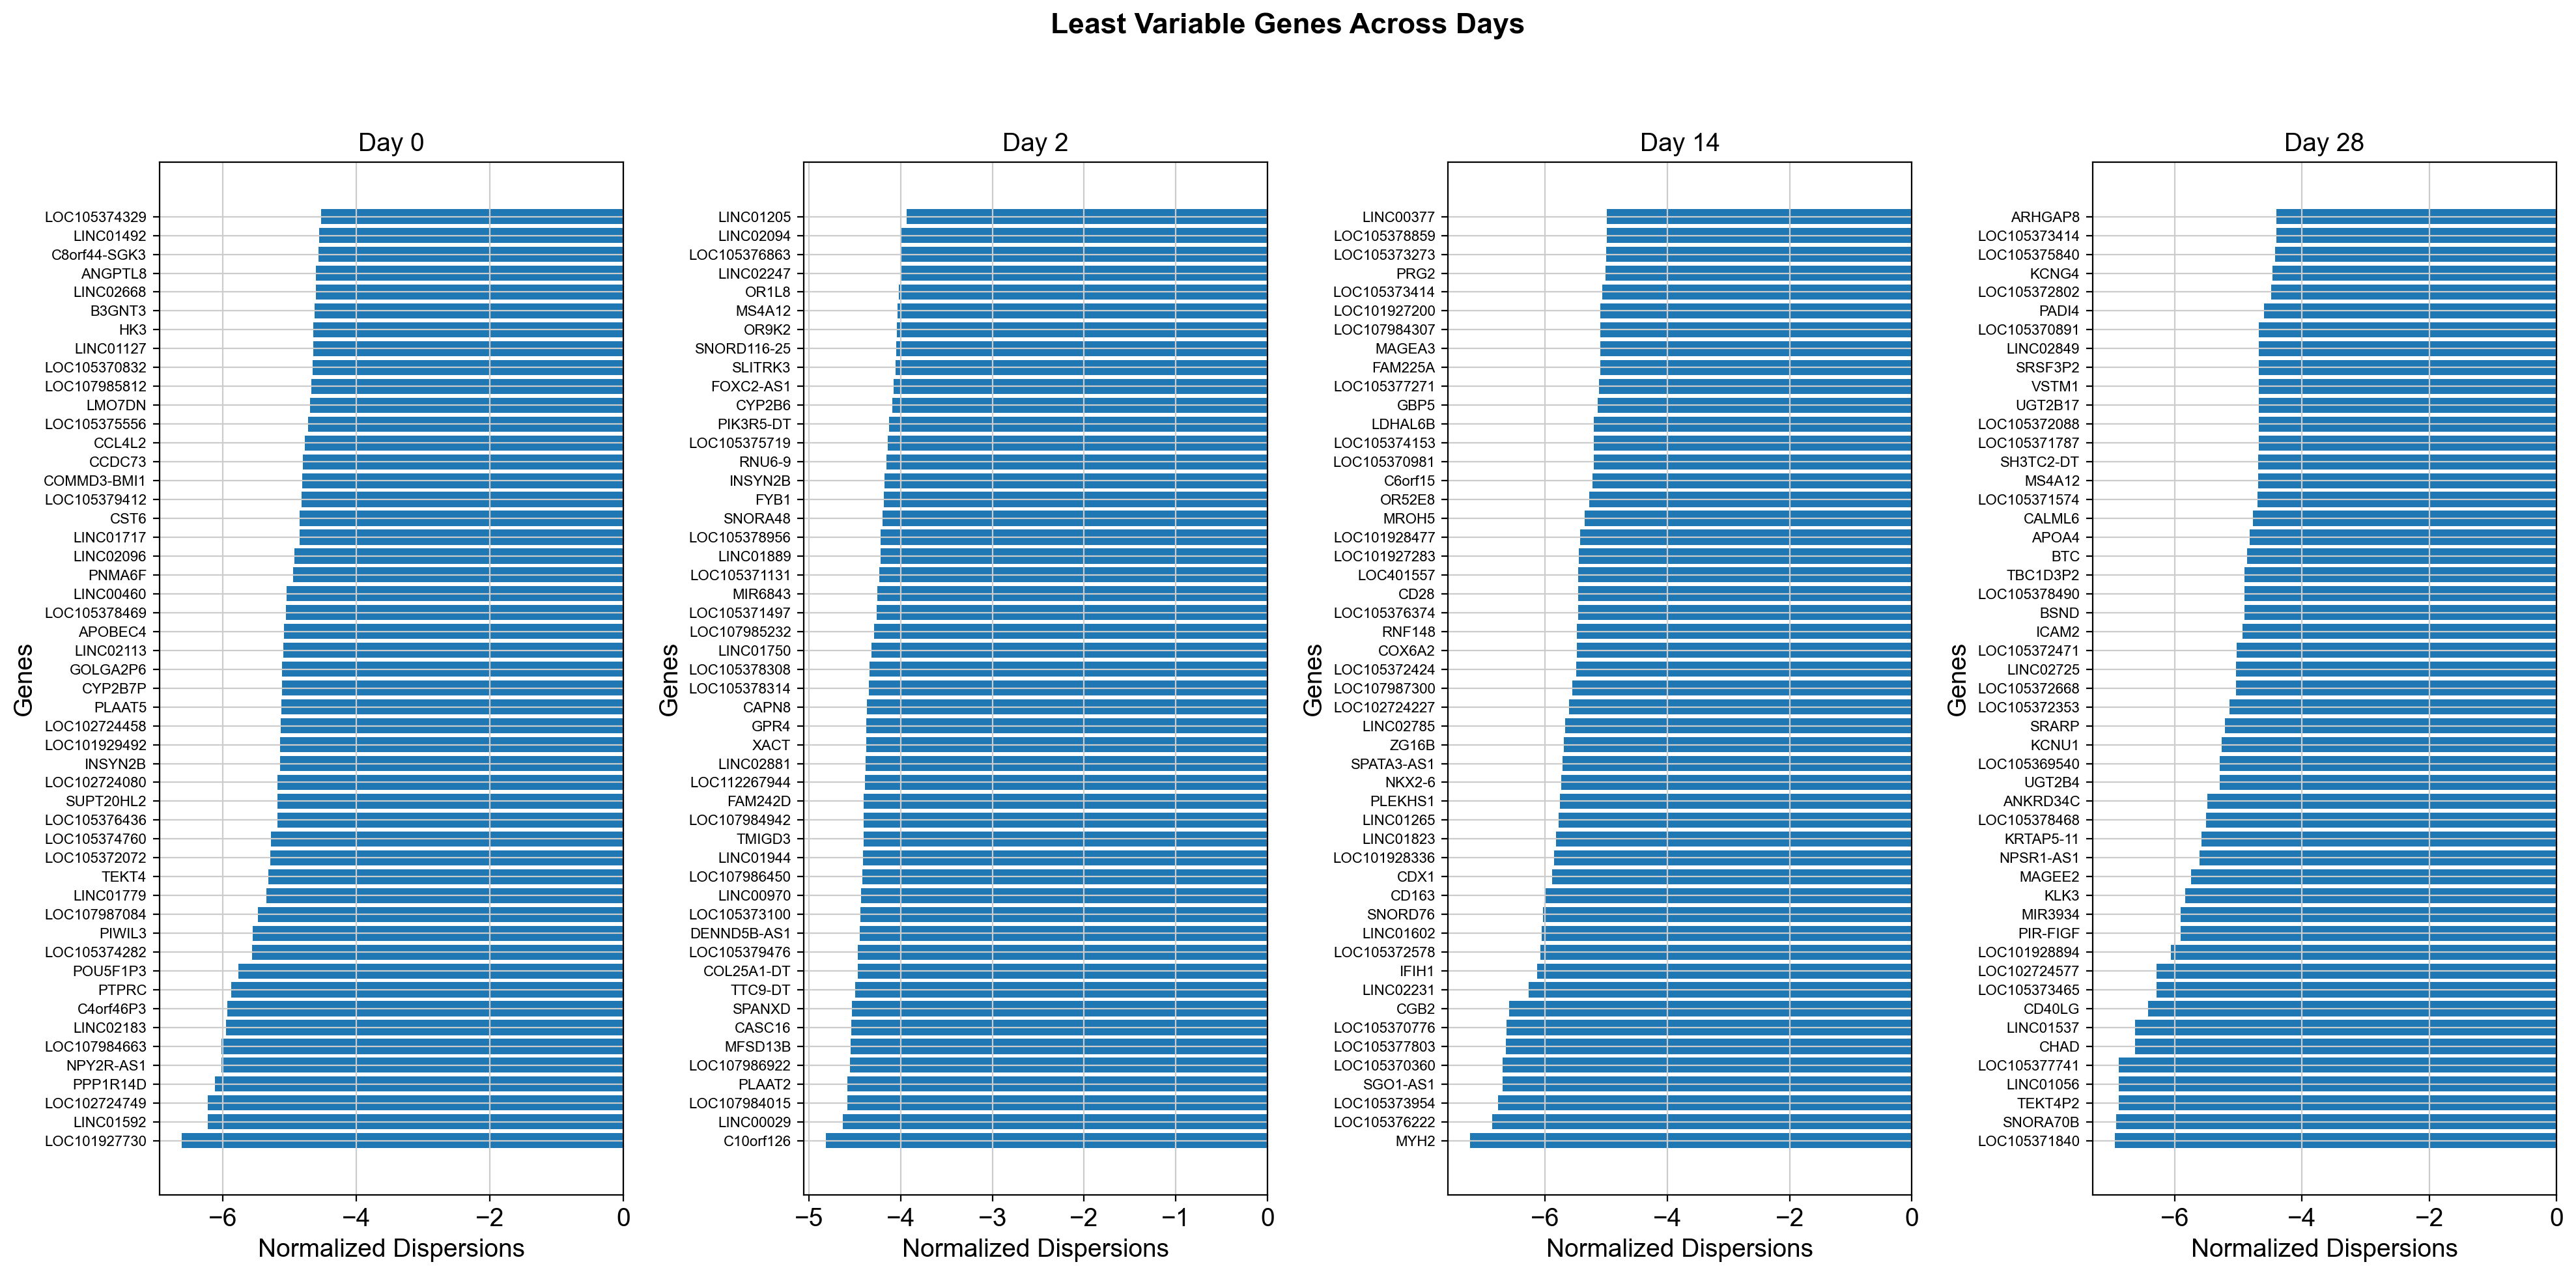

In [8]:
### Least variable genes ###
# List of datasets and their corresponding day labels
datasets = [day0, day2, day14, day28]
titles = ['Day 0', 'Day 2', 'Day 14', 'Day 28']

# Function to extract top 50 least variable genes
def get_least_variable_genes(data):
    return set(data.var['dispersions_norm'].nsmallest(50).index)

# Extract top 50 genes for each day using a list comprehension
gene_sets = [get_least_variable_genes(data) for data in datasets]

# Finding unique and common genes
unique_genes = {title: genes.difference(set.union(*(gene_sets[:i] + gene_sets[i+1:])))
                for i, (genes, title) in enumerate(zip(gene_sets, titles))}

common_genes = set.intersection(*gene_sets)

# Output unique genes for each day
print("Unique least variable genes by day:")
for day, genes in unique_genes.items():
    print(f"{day}: {genes}")

# Output genes common to all days
print("\nCommon least variable genes across all days:", common_genes)

# Plotting least variable genes for each day
fig, axes = plt.subplots(1, 4, figsize=(20, 10))  # 1 row, 4 columns
for ax, data, title, gene_set in zip(axes, datasets, titles, gene_sets):
    # Filter data to include only the top 50 least variable genes for each dataset
    top_genes = data.var.loc[data.var.index.isin(gene_set)]
    dispersions = top_genes['dispersions_norm'].sort_values()  # Sorted dispersions
    ax.barh(dispersions.index, dispersions.values)
    ax.set_title(title)
    ax.set_xlabel('Normalized Dispersions')
    ax.set_ylabel('Genes')
    ax.tick_params(axis='y', labelsize=8)

fig.suptitle('Least Variable Genes Across Days', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Unique most variable genes by day:
Day 0: {'LOC105374155', 'LOC112268175', 'DUSP23', 'GDF15', 'PTTG1', 'CDKN1A', 'LINC01399', 'PLK2', 'OR2A9P', 'H4C3', 'HCG24', 'LOC105370022', 'PTCHD4', 'H1-2', 'LOC105377676', 'SCGN', 'AURKA', 'TPX2', 'LOC105371840', 'MT1G', 'ALDOB', 'SGK3', 'H2AC12', 'UTY', 'TNNT1', 'H1-4', 'CMKLR2-AS', 'SIRPB2', 'MT1E', 'LINC02744', 'TEX43', 'AMER3', 'SNAR-C3', 'LINC02608', 'PLK1', 'SFN', 'LINC01856', 'UNCX'}
Day 2: {'ONECUT1', 'ELAVL3', 'LOC101929512', 'CCL2', 'VSX1', 'IL32', 'DLL1', 'TAGLN', 'SSTR2', 'NPPB', 'SCG3', 'LOC107986382', 'CYP26A1', 'GADD45G', 'ZMAT4', 'ZNF385D', 'THBS1', 'ASPM', 'PPP1R14C', 'CRABP1', 'DOK5', 'INSM1', 'MYL9', 'TESC', 'EDN1', 'LINC02183', 'ASIC4-AS1', 'CAVIN1', 'DCX', 'RASD1', 'ACTA1', 'VASH2', 'ANKRD1', 'DLL3', 'PSTPIP1', 'CNN1', 'PHLDA1'}
Day 14: {'LOC105377378', 'LOC105373627', 'NEUROD1', 'ERBB3', 'LASTR', 'LOC105376311', 'PLP1', 'CENPF', 'LOC105372525', 'POU4F1', 'MEGF10', 'LINC01518', 'PDZRN4', 'HMGA2', 'DMRT3', 'COL5A2', 'MUCL1', 'I

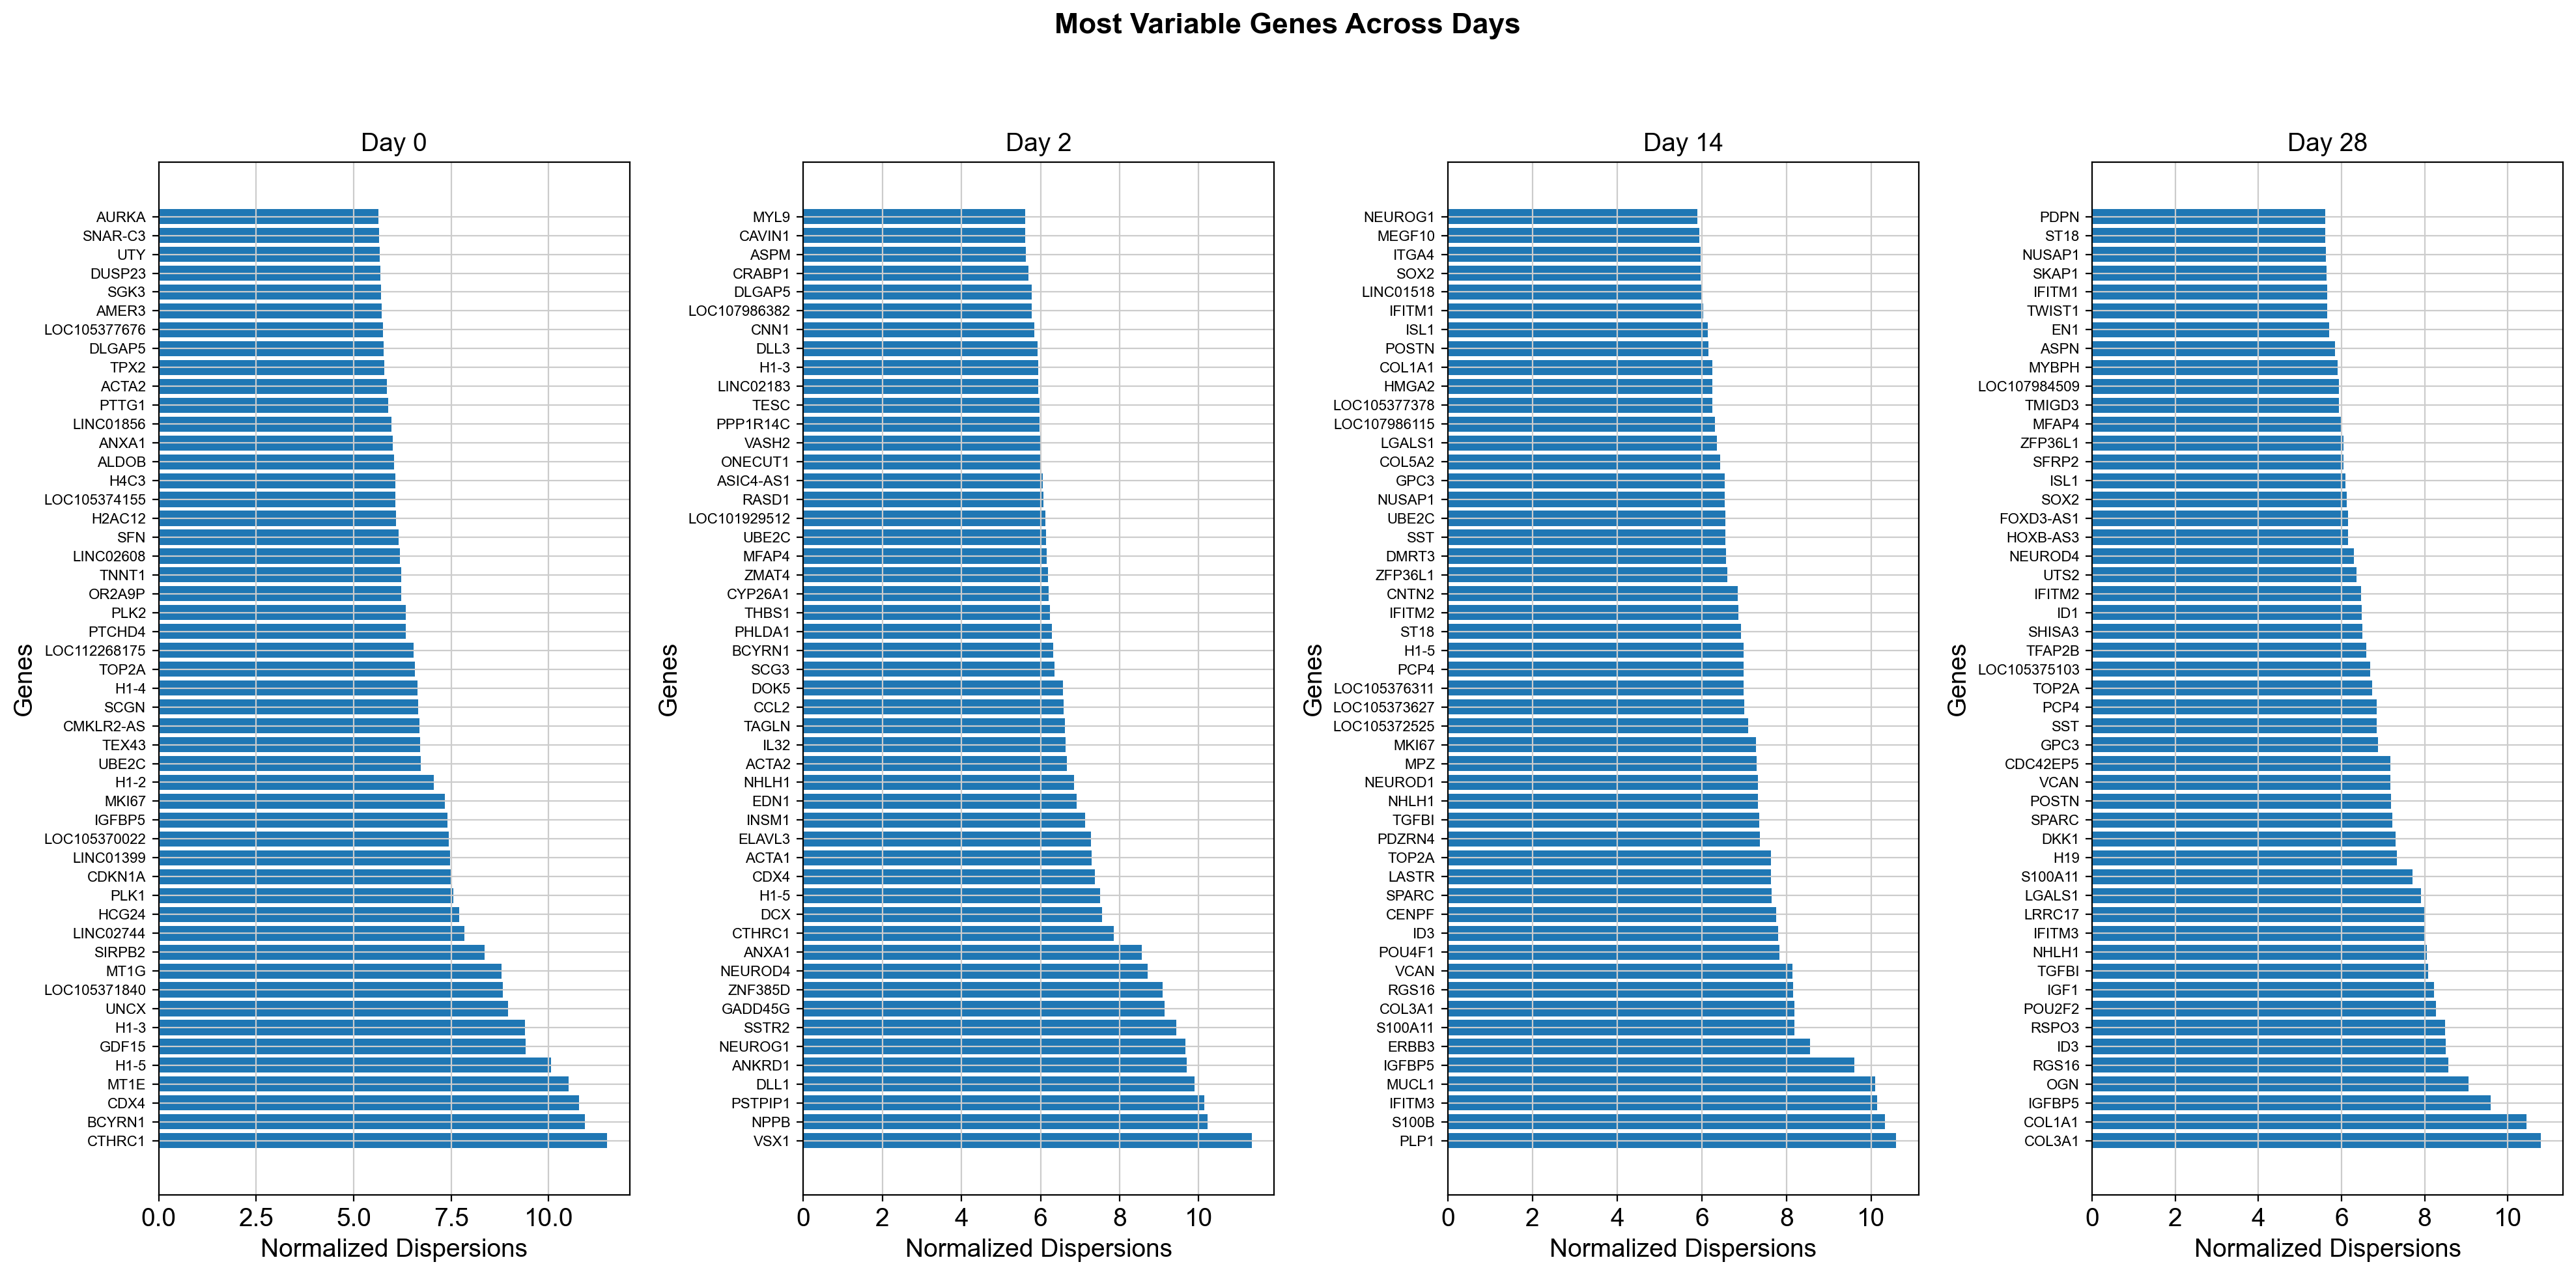

In [9]:
### Most variable genes ###
# List of datasets and their corresponding day labels
datasets = [day0, day2, day14, day28]
titles = ['Day 0', 'Day 2', 'Day 14', 'Day 28']

# Function to extract top 50 most variable genes
def get_most_variable_genes(data):
    return set(data.var['dispersions_norm'].nlargest(50).index)

# Extract top 50 genes for each day using a list comprehension
gene_sets = [get_most_variable_genes(data) for data in datasets]

# Finding unique and common genes
unique_genes = {title: genes.difference(set.union(*(gene_sets[:i] + gene_sets[i+1:])))
                for i, (genes, title) in enumerate(zip(gene_sets, titles))}

common_genes = set.intersection(*gene_sets)

# Output unique genes for each day
print("Unique most variable genes by day:")
for day, genes in unique_genes.items():
    print(f"{day}: {genes}")

# Output genes common to all days
print("\nCommon most variable genes across all days:", common_genes)

# Plotting least variable genes for each day
fig, axes = plt.subplots(1, 4, figsize=(20, 10))  # 1 row, 4 columns
for ax, data, title, gene_set in zip(axes, datasets, titles, gene_sets):
    # Filter data to include only the top 50 most variable genes for each dataset
    top_genes = data.var.loc[data.var.index.isin(gene_set)]
    dispersions = top_genes['dispersions_norm'].sort_values(ascending=False)  # Sorted dispersions in descending order
    ax.barh(dispersions.index, dispersions.values)
    ax.set_title(title)
    ax.set_xlabel('Normalized Dispersions')
    ax.set_ylabel('Genes')
    ax.tick_params(axis='y', labelsize=8)

fig.suptitle('Most Variable Genes Across Days', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [10]:
# List of datasets and their corresponding day labels
datasets = [day0, day2, day14, day28]
titles = ['Day 0', 'Day 2', 'Day 14', 'Day 28']

# Function to extract top 50 least expressed genes based on mean_counts
def get_least_expressed_genes(data):
    return set(data.var['mean_counts'].nsmallest(50).index)

# Extract top 50 genes for each day using a list comprehension
gene_sets = [get_least_expressed_genes(data) for data in datasets]

# Finding unique and common genes
unique_genes = {title: genes.difference(set.union(*(gene_sets[:i] + gene_sets[i+1:])))
                for i, (genes, title) in enumerate(zip(gene_sets, titles))}

common_genes = set.intersection(*gene_sets)

# Output unique genes for each day
print("Unique least expressed genes by day:")
for day, genes in unique_genes.items():
    print(f"{day}: {genes}")

# Output genes common to all days
print("\nCommon least expressed genes across all days:", common_genes)

Unique least expressed genes by day:
Day 0: {'LOC101926964', 'PIN1P1', 'LOC112268224', 'LOC105378710', 'LOC112268261', 'PLA2G2D', 'NCMAP-DT', 'LINC02794', 'KAZN-AS1', 'HTR6', 'LINC01738', 'LOC107985728', 'FOXD2', 'C1orf87', 'TTC22', 'ELAVL4-AS1', 'PERM1'}
Day 2: {'LOC105378605', 'LOC105378810', 'SNORD46', 'LOC107984909', 'LOC100996583', 'CFAP107', 'LOC105378598', 'LOC107984998', 'SNORA73A', 'LOC102724319', 'LOC105378735', 'NCMAP', 'EPHA8', 'LOC107984850', 'SNORD45A', 'LOC107984961'}
Day 14: {'LOC107985093', 'LINC01761', 'LOC105378649', 'LOC107985377', 'LOC101928334', 'SNORD45B', 'GRHL3-AS1', 'LCK', 'LINC02800', 'SNORD99', 'BRDT', 'RNF223', 'HENMT1', 'LINC02786'}
Day 28: {'LINC01768', 'TMEM82', 'LOC105378915', 'H2AC19', 'PABPC4-AS1', 'LOC107984943', 'LOC105371215', 'LOC101927560', 'LOC101928163', 'LOC105378937', 'LINC01780', 'HNRNPCL1', 'LOC105378620', 'LOC105378701', 'PLA2G2A', 'LINC01758', 'HAO2', 'LOC101928219', 'C1orf94', 'FLG', 'SNORA55', 'LOC107985174'}

Common least expressed gen

/var/folders/8j/tqhxq0y57p3fdz24yb_6j2gw0000gn/T/ipykernel_3958/1839580634.py:8: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata = day0.concatenate([day2, day14, day28], join='inner', batch_categories=['Day 0', 'Day 2', 'Day 14', 'Day 28'])
/Users/cecileherbermann/opt/anaconda3/envs/scgpt/lib/python3.12/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


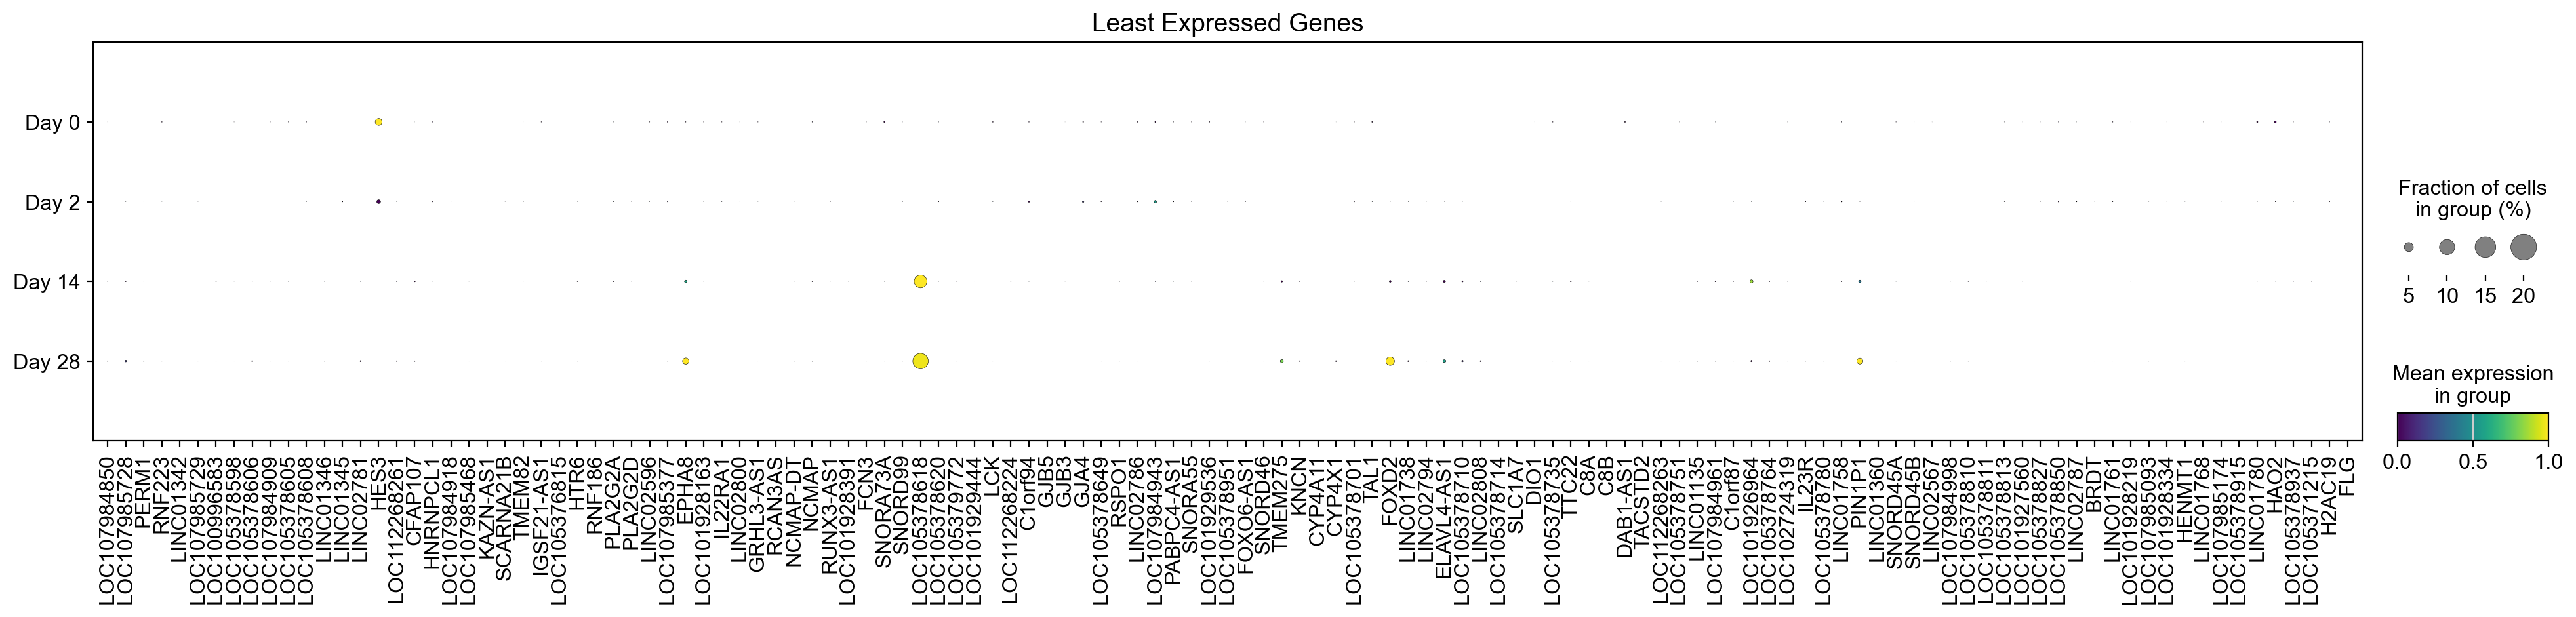

In [30]:
# First, add a 'day' column to each dataset to mark each observation
day0.obs['day'] = 'Day 0'
day2.obs['day'] = 'Day 2'
day14.obs['day'] = 'Day 14'
day28.obs['day'] = 'Day 28'

# Concatenate AnnData objects, assuming they all have the same variables (genes)
adata = day0.concatenate([day2, day14, day28], join='inner', batch_categories=['Day 0', 'Day 2', 'Day 14', 'Day 28'])

# Function to extract top 50 least expressed genes based on mean_counts
def get_least_expressed_genes(data):
    return set(data.var['mean_counts'].nsmallest(50).index)

# Extract top 50 genes for each concatenated part of the dataset
genes_day0 = get_least_expressed_genes(day0)
genes_day2 = get_least_expressed_genes(day2)
genes_day14 = get_least_expressed_genes(day14)
genes_day28 = get_least_expressed_genes(day28)

# Combine all least expressed genes into one list for simplicity
all_least_expressed_genes = genes_day0.union(genes_day2).union(genes_day14).union(genes_day28)

# Filter adata to include only the least expressed genes
adata_filtered = adata[:, adata.var_names.isin(all_least_expressed_genes)]

sc.pl.dotplot(adata_filtered, var_names=adata_filtered.var_names, groupby='day',
              color_map='viridis', standard_scale='var', figsize=(24, 4), title='Least Expressed Genes')

In [31]:
# List of datasets and their corresponding day labels
datasets = [day0, day2, day14, day28]
titles = ['Day 0', 'Day 2', 'Day 14', 'Day 28']

# Function to extract top 50 most expressed genes based on mean_counts
def get_most_expressed_genes(data):
    return set(data.var['mean_counts'].nlargest(50).index)

# Extract top 50 genes for each day using a list comprehension
gene_sets = [get_most_expressed_genes(data) for data in datasets]

# Finding unique and common genes
unique_genes = {title: genes.difference(set.union(*(gene_sets[:i] + gene_sets[i+1:])))
                for i, (genes, title) in enumerate(zip(gene_sets, titles))}

common_genes = set.intersection(*gene_sets)

# Output unique genes for each day
print("Unique most expressed genes by day:")
for day, genes in unique_genes.items():
    print(f"{day}: {genes}")

# Output genes common to all days
print("\nCommon most expressed genes across all days:", common_genes)

Unique most expressed genes by day:
Day 0: {'NPM1', 'RPLP0', 'RPL8', 'RPL26'}
Day 2: {'RPL24', 'RPL37', 'MDK'}
Day 14: {'CRABP1', 'TUBB2B', 'RBP1', 'RPL28'}
Day 28: {'MARCKSL1', 'MT-ND5'}

Common most expressed genes across all days: {'MT-ND4', 'MT-ATP6', 'RPS23', 'RPS2', 'ACTB', 'RPS12', 'RPL15', 'RPL11', 'MT-RNR2', 'PTMA', 'RPL13', 'MT-RNR1', 'RPL32', 'RPS8', 'RPS3A', 'MT-CYTB', 'EEF1A1', 'MT-COX3', 'ACTG1', 'RPS14', 'RPS19', 'RPS4X', 'RPLP1', 'RPL10', 'RPS18', 'MALAT1', 'MT-COX2', 'MT-COX1'}


/var/folders/8j/tqhxq0y57p3fdz24yb_6j2gw0000gn/T/ipykernel_3958/4201753372.py:8: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata = day0.concatenate([day2, day14, day28], join='inner', batch_categories=['Day 0', 'Day 2', 'Day 14', 'Day 28'])
/Users/cecileherbermann/opt/anaconda3/envs/scgpt/lib/python3.12/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


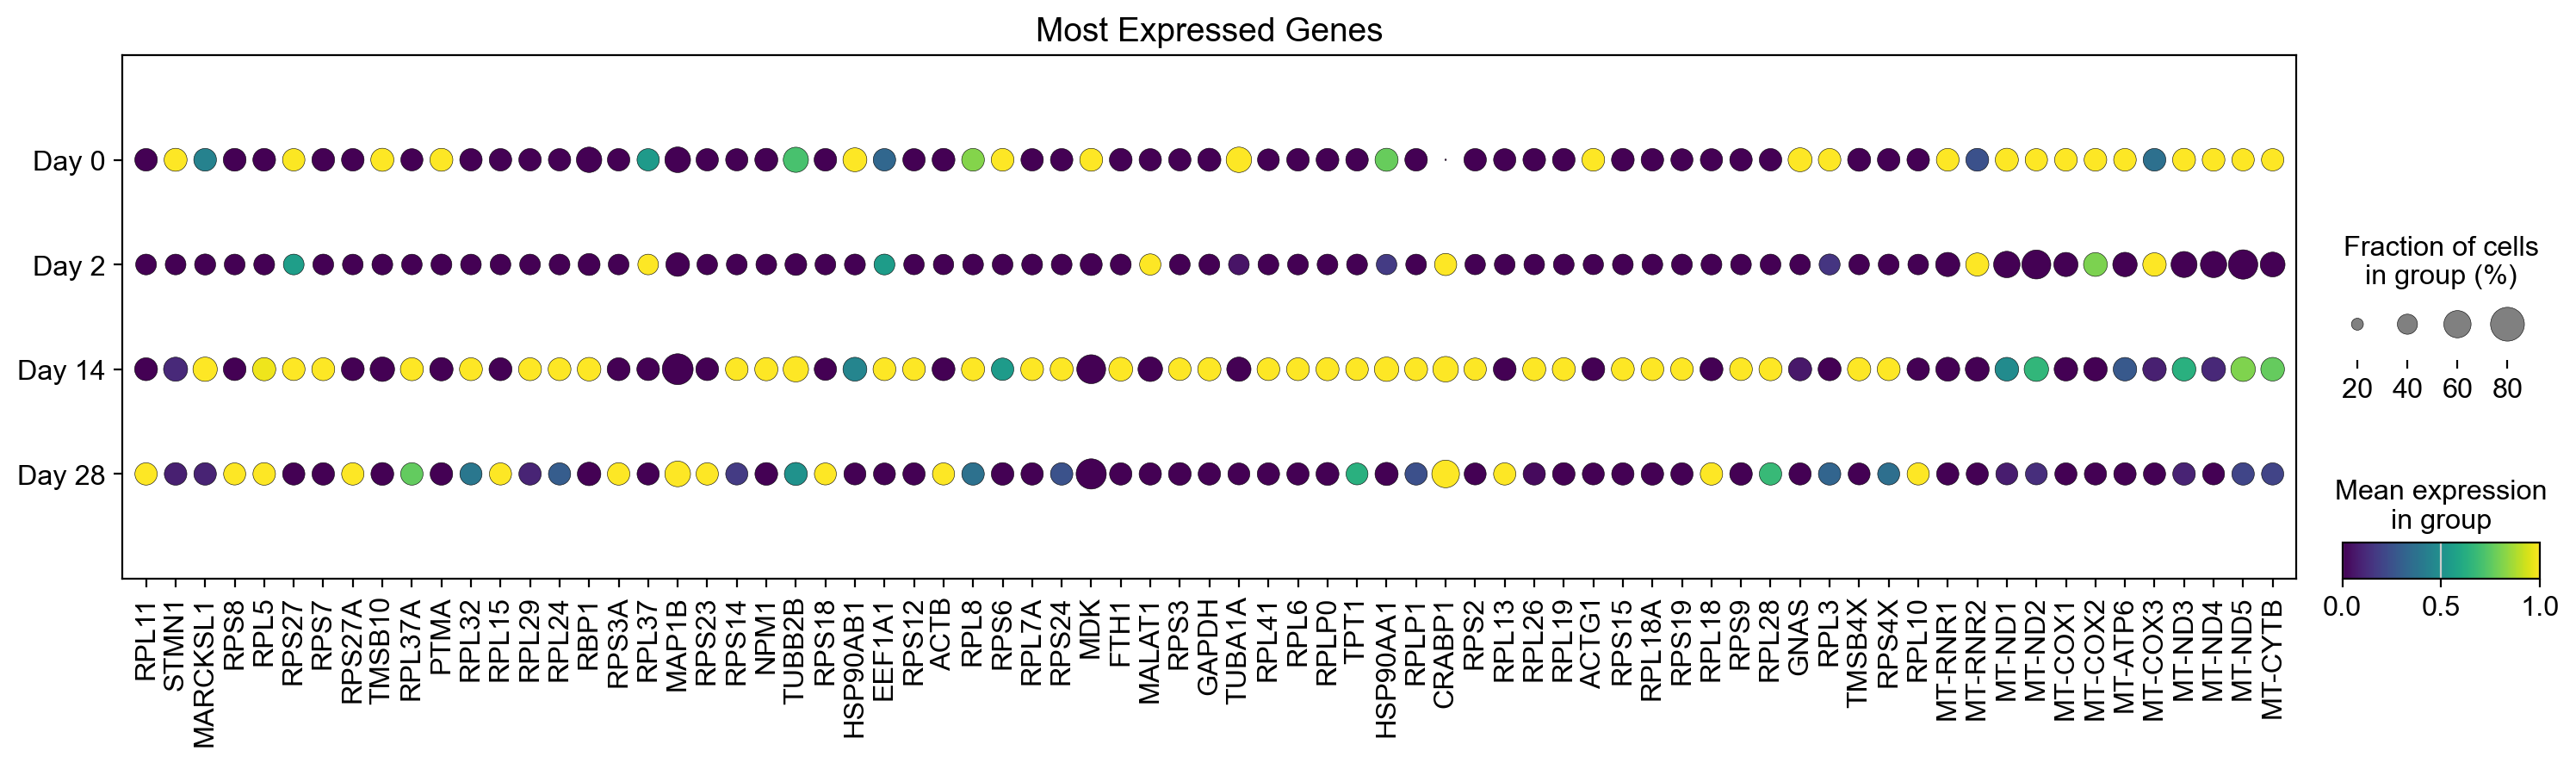

In [29]:
# First, add a 'day' column to each dataset to mark each observation
day0.obs['day'] = 'Day 0'
day2.obs['day'] = 'Day 2'
day14.obs['day'] = 'Day 14'
day28.obs['day'] = 'Day 28'

# Concatenate AnnData objects, assuming they all have the same variables (genes)
adata = day0.concatenate([day2, day14, day28], join='inner', batch_categories=['Day 0', 'Day 2', 'Day 14', 'Day 28'])

# Function to extract top 50 most expressed genes based on mean_counts
def get_most_expressed_genes(data):
    return set(data.var['mean_counts'].nlargest(50).index)

# Extract top 50 genes for each concatenated part of the dataset
genes_day0 = get_most_expressed_genes(day0)
genes_day2 = get_most_expressed_genes(day2)
genes_day14 = get_most_expressed_genes(day14)
genes_day28 = get_most_expressed_genes(day28)

# Combine all most expressed genes into one list for simplicity
all_most_expressed_genes = genes_day0.union(genes_day2).union(genes_day14).union(genes_day28)

# Filter adata to include only the most expressed genes
adata_filtered = adata[:, adata.var_names.isin(all_most_expressed_genes)]

# Plotting the dot plot for most expressed genes
sc.pl.dotplot(adata_filtered, var_names=adata_filtered.var_names, groupby='day',
              color_map='viridis', standard_scale='var', figsize=(18, 4), title='Most Expressed Genes')